# Weather Data Analysis

__Introduction__

Weather data plays a crucialrole  in our daily lives and various industries. from agriculture to transportation and emergency preparedness. Understanding and effectively utilizing weather data can help individuals and organizations make informed decisions, improve safety, and optimize operations.

__Objective__

The primary objective of this exploratory data analysis (EDA)  is to uncover patterns, trends, and relationships within the weather data.  By employing statistical and visual analysis technniques, we aim to extract meaningful insights that contribute to deeper understanding of the atmospheric conditions during the observation period.

__Types Of Weather Data__

Weather data encompasses a widee range of information  collected from various sources, including meteorological stations, satelites, weather baloons, and weather radars. The key types of weather data includes:

1. `Temperature:` Information about the current and forecasted temperature, which impacts clothing choices, heating and cooling needs, and agricultural practices.
2. `Precipitation:` Data on rainfall, snowfall and other precipitation, critical for water resource management, flood forcasting ans agricultural practices.
3. `Humidity:` Measures the amount of moistures in the air, influencing human comfort, crop health, and weather patterns.
4. `Wind Speed And Direction:` wind dataa is vital for aviation, renewable energy generation and understanding weather patterns.
5.  `Atmospheric Pressure:` Information anout the pressure exerted by the atmosphere, useful for weather predictions and altimeter settings for aviation.
6. `Cloud Cover:` Indicates the fraction of the sky covered by clouds and helps determine potential rainfal and solar radiation.
7. `UV Index:` Measures the strength of ultraviolet radiation from the sun, important for skin protection and outdoor activities.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings, gc, joblib
warnings.filterwarnings('ignore')
from scipy.stats import probplot

#### Reading Data

In [2]:
df = pd.read_csv("Weather Data.csv")
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [3]:
df.tail()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,12/31/2012 23:00,0.0,-2.1,86,30,11.3,99.89,Snow


In [4]:
df.shape

(8784, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [6]:
# Change data type of Date/Time column from object to Datetime
df['Date/Time'] = pd.to_datetime(df['Date/Time'], errors = 'coerce')

In [7]:
# Date-type of Date/Time column  has changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date/Time         8784 non-null   datetime64[ns]
 1   Temp_C            8784 non-null   float64       
 2   Dew Point Temp_C  8784 non-null   float64       
 3   Rel Hum_%         8784 non-null   int64         
 4   Wind Speed_km/h   8784 non-null   int64         
 5   Visibility_km     8784 non-null   float64       
 6   Press_kPa         8784 non-null   float64       
 7   Weather           8784 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 549.1+ KB


In [8]:
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [9]:
df.duplicated().sum()

0

#### Statistical Description


In [10]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [11]:
# renaming the data 
df1 = df.rename(columns= {'Temp_C' : 'Temperature_C', 'Rel Hum_%' : 'Relative_Humidity_%', 'Press_kPa':'Pressure_kPa', 'Weather': 'Weather_Condition'})
df1.head()

,Date/Time,Temperature_C,Dew Point Temp_C,Relative_Humidity_%,Wind Speed_km/h,Visibility_km,Pressure_kPa,Weather_Condition
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [12]:
# Unique Values
df1.nunique()

Date/Time              8784
Temperature_C           533
Dew Point Temp_C        489
Relative_Humidity_%      83
Wind Speed_km/h          34
Visibility_km            24
Pressure_kPa            518
Weather_Condition        50
dtype: int64

#### Exploratory Data Analysis

Skewness of Temperature_C: -0.17766634898276745
Kurtosis of Temperature_C: -0.9155567505542197


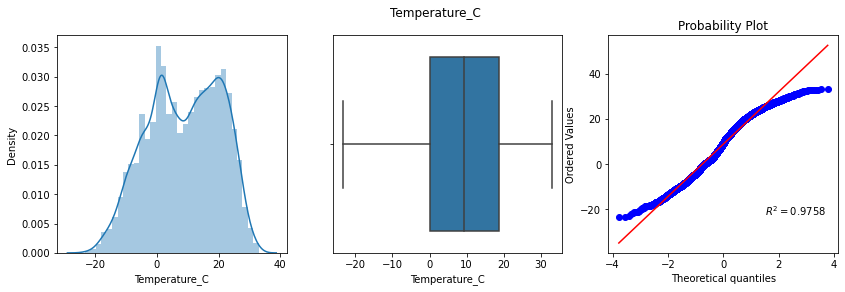

Skewness of Dew Point Temp_C: -0.31843338608156885
Kurtosis of Dew Point Temp_C: -0.8157875944814732


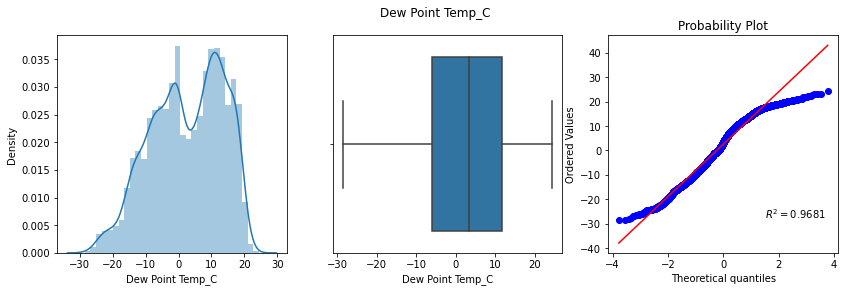

Skewness of Relative_Humidity_%: -0.32383026939145887
Kurtosis of Relative_Humidity_%: -0.5529352317433536


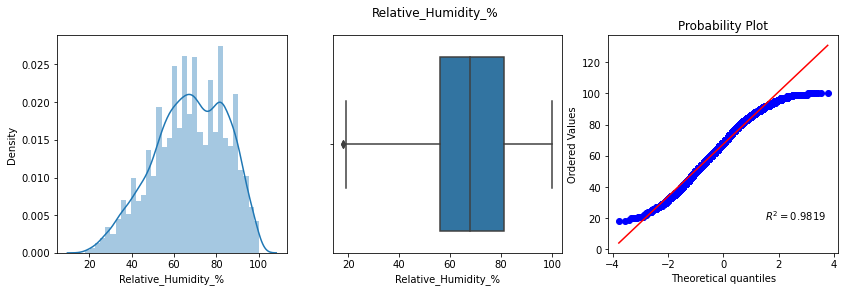

Skewness of Wind Speed_km/h: 0.8713742625776061
Kurtosis of Wind Speed_km/h: 1.5407125247939306


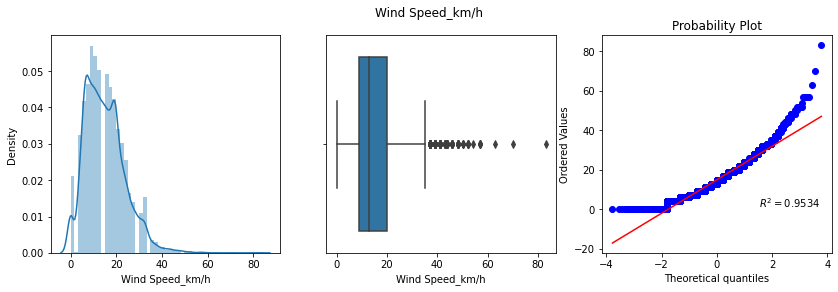

Skewness of Visibility_km: 0.41336159676061063
Kurtosis of Visibility_km: -0.35103132005897164


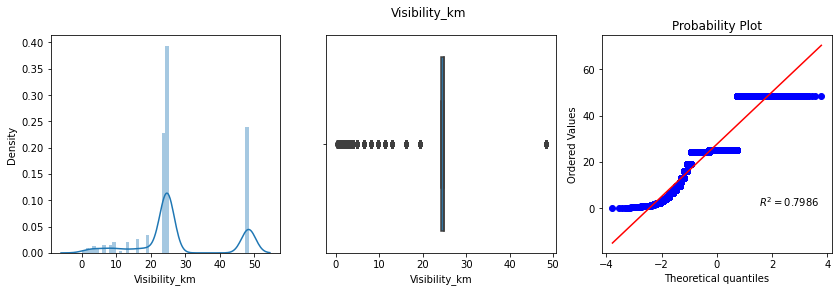

Skewness of Pressure_kPa: -0.22992511978286803
Kurtosis of Pressure_kPa: 0.7144508236613349


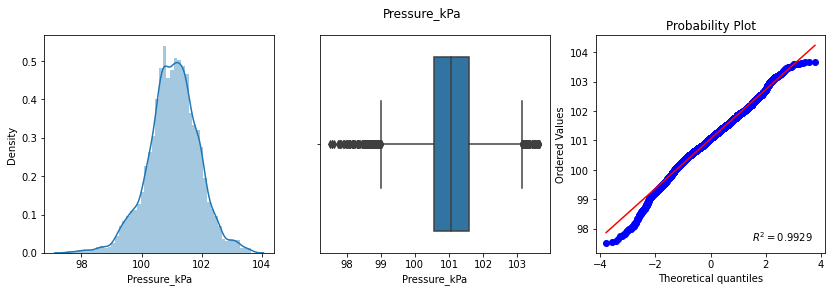

In [13]:
for col in df1.select_dtypes(np.number).columns:
    plt.figure(figsize=(14,4))
    print(f"Skewness of {col}:",df1[col].skew())
    print(f"Kurtosis of {col}:",df1[col].kurtosis())
    plt.subplot(131)
    sns.distplot(df1[col])
    plt.subplot(132)
    sns.boxplot(df1[col])
    plt.subplot(133)
    probplot(df1[col],dist='norm',rvalue=True,plot=plt)
    plt.suptitle(col)
    plt.show()

In [14]:
# Check how many times values repeated in columns 
df1.Weather_Condition.value_counts()

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

In [15]:
df1['Weather_Condition'].nunique()

50

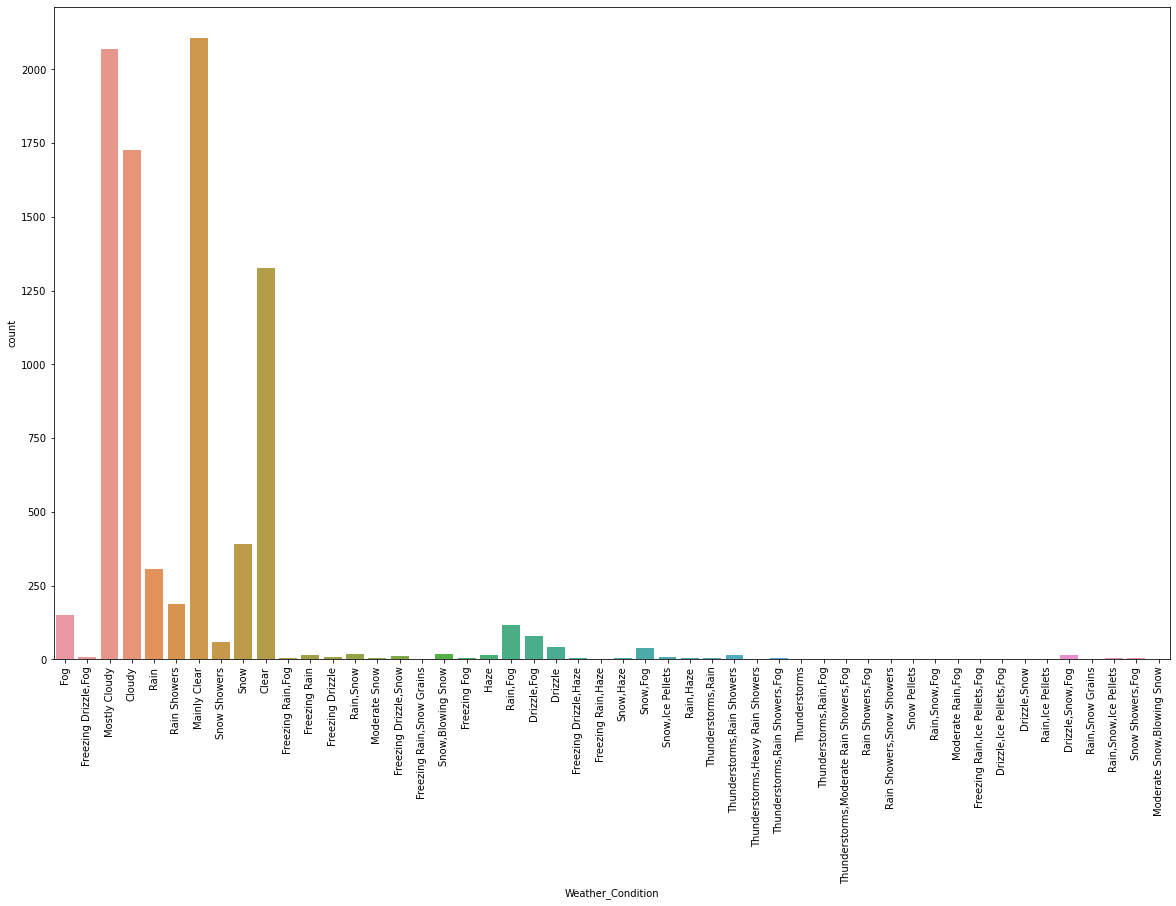

9203

In [16]:
plt.figure(figsize = (20,12))
fig = sns.countplot(df1['Weather_Condition'])
plt.xticks(rotation = 90)
plt.show(fig)
plt.close('all')
del fig
gc.collect()

In [17]:
df1['Temperature_C'].value_counts()

 16.6    65
 1.1     58
 0.8     47
 1.5     45
 19.3    44
         ..
-20.7     1
-21.0     1
 31.8     1
 32.6     1
-21.3     1
Name: Temperature_C, Length: 533, dtype: int64

In [18]:
df1['Temperature_C'].nunique()

533

In [19]:
df1['Temperature_C'].mean()

8.79814435336981

In [20]:
df1['Wind Speed_km/h'].value_counts()

9     830
11    791
13    735
15    719
7     677
17    666
19    616
6     609
20    496
4     474
22    439
24    374
0     309
26    242
28    205
30    161
32    139
33     85
35     53
37     45
39     24
41     22
44     14
43     13
48     13
46     11
52      7
57      5
50      4
2       2
83      1
70      1
63      1
54      1
Name: Wind Speed_km/h, dtype: int64

In [21]:
df1['Wind Speed_km/h'].nunique()

34

In [22]:
df1['Month'] = df1['Date/Time'].dt.month

In [23]:
df1['Year'] = df1['Date/Time'].dt.year

In [24]:
df1.head(2)

,Date/Time,Temperature_C,Dew Point Temp_C,Relative_Humidity_%,Wind Speed_km/h,Visibility_km,Pressure_kPa,Weather_Condition,Month,Year
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,1,2012
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1,2012


In [25]:
df['Wind Speed_km/h'].mean()

14.94546903460838

In [26]:
print("When weather was clear-")
Clear = df1[df1['Weather_Condition'] == "Clear"]
Clear

When weather was clear-


,Date/Time,Temperature_C,Dew Point Temp_C,Relative_Humidity_%,Wind Speed_km/h,Visibility_km,Pressure_kPa,Weather_Condition,Month,Year
67,2012-01-03 19:00:00,-16.9,-24.8,50,24,25.0,101.74,Clear,1,2012
114,2012-01-05 18:00:00,-7.1,-14.4,56,11,25.0,100.71,Clear,1,2012
115,2012-01-05 19:00:00,-9.2,-15.4,61,7,25.0,100.80,Clear,1,2012
116,2012-01-05 20:00:00,-9.8,-15.7,62,9,25.0,100.83,Clear,1,2012
117,2012-01-05 21:00:00,-9.0,-14.8,63,13,25.0,100.83,Clear,1,2012
...,...,...,...,...,...,...,...,...,...,...
8646,2012-12-26 06:00:00,-13.4,-14.8,89,4,25.0,102.47,Clear,12,2012
8698,2012-12-28 10:00:00,-6.1,-8.6,82,19,24.1,101.27,Clear,12,2012
8713,2012-12-29 01:00:00,-11.9,-13.6,87,11,25.0,101.31,Clear,12,2012
8714,2012-12-29 02:00:00,-11.8,-13.1,90,13,25.0,101.33,Clear,12,2012


In [27]:
df1.groupby("Weather_Condition").get_group("Clear")

,Date/Time,Temperature_C,Dew Point Temp_C,Relative_Humidity_%,Wind Speed_km/h,Visibility_km,Pressure_kPa,Weather_Condition,Month,Year
67,2012-01-03 19:00:00,-16.9,-24.8,50,24,25.0,101.74,Clear,1,2012
114,2012-01-05 18:00:00,-7.1,-14.4,56,11,25.0,100.71,Clear,1,2012
115,2012-01-05 19:00:00,-9.2,-15.4,61,7,25.0,100.80,Clear,1,2012
116,2012-01-05 20:00:00,-9.8,-15.7,62,9,25.0,100.83,Clear,1,2012
117,2012-01-05 21:00:00,-9.0,-14.8,63,13,25.0,100.83,Clear,1,2012
...,...,...,...,...,...,...,...,...,...,...
8646,2012-12-26 06:00:00,-13.4,-14.8,89,4,25.0,102.47,Clear,12,2012
8698,2012-12-28 10:00:00,-6.1,-8.6,82,19,24.1,101.27,Clear,12,2012
8713,2012-12-29 01:00:00,-11.9,-13.6,87,11,25.0,101.31,Clear,12,2012
8714,2012-12-29 02:00:00,-11.8,-13.1,90,13,25.0,101.33,Clear,12,2012


In [38]:
# When weather condition is clear and visibility is more than 40km
df1[(df1['Weather_Condition'] == 'Clear') | (df1['Visibility_km'] > 40)]

,Date/Time,Temperature_C,Dew Point Temp_C,Relative_Humidity_%,Wind Speed_km/h,Visibility_km,Pressure_kPa,Weather_Condition,Month,Year
67,2012-01-03 19:00:00,-16.9,-24.8,50,24,25.0,101.74,Clear,1,2012
106,2012-01-05 10:00:00,-6.0,-10.0,73,17,48.3,100.45,Mainly Clear,1,2012
107,2012-01-05 11:00:00,-5.6,-10.2,70,22,48.3,100.41,Mainly Clear,1,2012
108,2012-01-05 12:00:00,-4.7,-9.6,69,20,48.3,100.38,Mainly Clear,1,2012
109,2012-01-05 13:00:00,-4.4,-9.7,66,26,48.3,100.40,Mainly Clear,1,2012
...,...,...,...,...,...,...,...,...,...,...
8749,2012-12-30 13:00:00,-12.4,-16.2,73,37,48.3,100.92,Mostly Cloudy,12,2012
8750,2012-12-30 14:00:00,-11.8,-16.1,70,37,48.3,100.96,Mainly Clear,12,2012
8751,2012-12-30 15:00:00,-11.3,-15.6,70,32,48.3,101.05,Mainly Clear,12,2012
8752,2012-12-30 16:00:00,-11.4,-15.5,72,26,48.3,101.15,Mainly Clear,12,2012


In [28]:
# When weather condition is snow
Snow = df1[df1['Weather_Condition'] == 'Snow']
Snow

,Date/Time,Temperature_C,Dew Point Temp_C,Relative_Humidity_%,Wind Speed_km/h,Visibility_km,Pressure_kPa,Weather_Condition,Month,Year
55,2012-01-03 07:00:00,-14.0,-19.5,63,19,25.0,100.95,Snow,1,2012
84,2012-01-04 12:00:00,-13.7,-21.7,51,11,24.1,101.25,Snow,1,2012
86,2012-01-04 14:00:00,-11.3,-19.0,53,7,19.3,100.97,Snow,1,2012
87,2012-01-04 15:00:00,-10.2,-16.3,61,11,9.7,100.89,Snow,1,2012
88,2012-01-04 16:00:00,-9.4,-15.5,61,13,19.3,100.79,Snow,1,2012
...,...,...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow,12,2012
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow,12,2012
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow,12,2012
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow,12,2012


In [29]:
# When wind speed is minimum
Min_Wind = df1.groupby('Wind Speed_km/h').get_group(df1['Wind Speed_km/h'].min())
Min_Wind

,Date/Time,Temperature_C,Dew Point Temp_C,Relative_Humidity_%,Wind Speed_km/h,Visibility_km,Pressure_kPa,Weather_Condition,Month,Year
97,2012-01-05 01:00:00,-7.5,-10.2,81,0,9.7,100.29,Snow,1,2012
123,2012-01-06 03:00:00,-10.6,-16.0,64,0,9.7,100.76,Snow,1,2012
145,2012-01-07 01:00:00,-8.5,-11.4,80,0,19.3,100.11,Cloudy,1,2012
160,2012-01-07 16:00:00,-3.6,-5.9,84,0,8.0,100.15,Snow,1,2012
165,2012-01-07 21:00:00,-1.3,-3.1,88,0,6.4,100.50,Snow,1,2012
...,...,...,...,...,...,...,...,...,...,...
7942,2012-11-26 22:00:00,-5.4,-9.6,72,0,25.0,101.90,Clear,11,2012
8028,2012-11-30 12:00:00,-9.3,-15.2,62,0,48.3,103.16,Mostly Cloudy,11,2012
8108,2012-12-03 20:00:00,3.5,0.7,82,0,25.0,101.99,Cloudy,12,2012
8212,2012-12-08 04:00:00,2.5,-1.2,77,0,25.0,101.13,Cloudy,12,2012


In [32]:
avg = df1['Wind Speed_km/h'].mean()
avg

14.94546903460838

In [33]:
df1[df1['Wind Speed_km/h'] == df1['Wind Speed_km/h'].median()]

,Date/Time,Temperature_C,Dew Point Temp_C,Relative_Humidity_%,Wind Speed_km/h,Visibility_km,Pressure_kPa,Weather_Condition,Month,Year
13,2012-01-01 13:00:00,0.2,-1.7,87,13,4.8,100.58,Fog,1,2012
16,2012-01-01 16:00:00,2.6,-0.2,82,13,12.9,99.93,Mostly Cloudy,1,2012
17,2012-01-01 17:00:00,3.0,0.0,81,13,16.1,99.81,Cloudy,1,2012
72,2012-01-04 00:00:00,-17.5,-24.2,56,13,25.0,101.88,Mostly Cloudy,1,2012
75,2012-01-04 03:00:00,-18.5,-24.6,59,13,25.0,101.88,Mainly Clear,1,2012
...,...,...,...,...,...,...,...,...,...,...
8712,2012-12-29 00:00:00,-11.6,-13.5,86,13,25.0,101.35,Mainly Clear,12,2012
8714,2012-12-29 02:00:00,-11.8,-13.1,90,13,25.0,101.33,Clear,12,2012
8736,2012-12-30 00:00:00,-9.6,-11.3,87,13,3.2,100.23,"Snow,Fog",12,2012
8740,2012-12-30 04:00:00,-9.3,-10.6,90,13,9.7,100.28,"Snow,Fog",12,2012


In [34]:
# When Wind Speed is max
df1[df1['Wind Speed_km/h'] == df1['Wind Speed_km/h'].max()]

,Date/Time,Temperature_C,Dew Point Temp_C,Relative_Humidity_%,Wind Speed_km/h,Visibility_km,Pressure_kPa,Weather_Condition,Month,Year
409,2012-01-18 01:00:00,3.7,-2.1,66,83,25.0,98.36,Mostly Cloudy,1,2012


In [35]:
# When Weather Condition is fog
df1[df1['Weather_Condition'] == 'Fog']

,Date/Time,Temperature_C,Dew Point Temp_C,Relative_Humidity_%,Wind Speed_km/h,Visibility_km,Pressure_kPa,Weather_Condition,Month,Year
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,1,2012
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1,2012
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,1,2012
5,2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog,1,2012
6,2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,Fog,1,2012
...,...,...,...,...,...,...,...,...,...,...
8716,2012-12-29 04:00:00,-16.0,-17.2,90,6,9.7,101.25,Fog,12,2012
8717,2012-12-29 05:00:00,-14.8,-15.9,91,4,6.4,101.25,Fog,12,2012
8718,2012-12-29 06:00:00,-13.8,-15.3,88,4,9.7,101.25,Fog,12,2012
8719,2012-12-29 07:00:00,-14.8,-16.4,88,7,8.0,101.22,Fog,12,2012


In [42]:
# When humidity is low
df1.groupby('Relative_Humidity_%').get_group(df1['Relative_Humidity_%'].min())

,Date/Time,Temperature_C,Dew Point Temp_C,Relative_Humidity_%,Wind Speed_km/h,Visibility_km,Pressure_kPa,Weather_Condition,Month,Year
1984,2012-03-23 16:00:00,15.5,-9.0,18,22,48.3,101.6,Cloudy,3,2012
3066,2012-05-07 18:00:00,20.7,-4.4,18,13,48.3,101.0,Mostly Cloudy,5,2012


In [43]:
# When Humidity id High
df1.groupby("Relative_Humidity_%").get_group(df1['Relative_Humidity_%'].max())

,Date/Time,Temperature_C,Dew Point Temp_C,Relative_Humidity_%,Wind Speed_km/h,Visibility_km,Pressure_kPa,Weather_Condition,Month,Year
1834,2012-03-17 10:00:00,2.6,2.6,100,0,0.2,102.37,Fog,3,2012
6572,2012-09-30 20:00:00,11.6,11.6,100,9,8.0,100.00,"Rain,Fog",9,2012
6606,2012-10-02 06:00:00,11.2,11.2,100,0,48.3,100.96,Mostly Cloudy,10,2012
6629,2012-10-03 05:00:00,11.0,11.0,100,11,3.2,101.38,Fog,10,2012
6630,2012-10-03 06:00:00,11.5,11.5,100,11,0.6,101.42,Fog,10,2012
6631,2012-10-03 07:00:00,11.7,11.7,100,13,0.6,101.49,Fog,10,2012
6632,2012-10-03 08:00:00,11.4,11.4,100,15,1.6,101.54,Fog,10,2012
6668,2012-10-04 20:00:00,14.1,14.1,100,4,9.7,101.10,Fog,10,2012
7038,2012-10-20 06:00:00,10.6,10.6,100,4,0.4,99.87,Fog,10,2012
8083,2012-12-02 19:00:00,5.9,5.9,100,15,3.6,100.67,"Drizzle,Fog",12,2012


##### Data Visualization

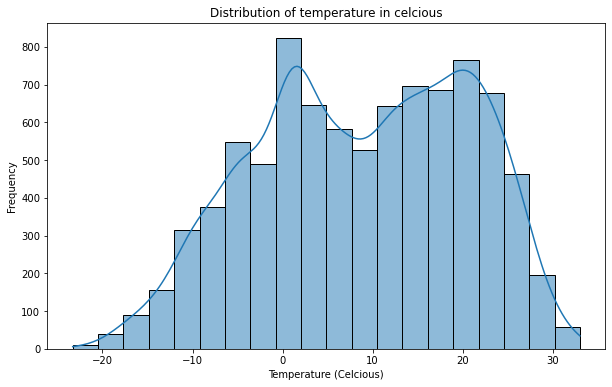

In [44]:
plt.figure(figsize = (10,6))
sns.histplot(data = df1, x = 'Temperature_C', bins = 20, kde = True)
plt.title('Distribution of temperature in celcious')
plt.xlabel('Temperature (Celcious)')
plt.ylabel('Frequency')
plt.show()


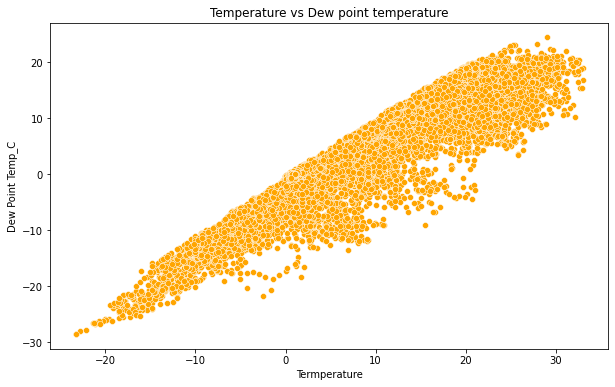

In [45]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = df1, x = 'Temperature_C', y = 'Dew Point Temp_C', color = 'orange' )
plt.title('Temperature vs Dew point temperature')
plt.xlabel('Termperature')
plt.ylabel('Dew Point Temp_C')
plt.show()

it can be concluded that the Dew Point Temperature and Temperature are increasing in a linear trend.

#### Correlation Heatmap For Numeric Columns

In [53]:
column_name = 'Weather_Condition'
if column_name in df1.columns:
    df_encoded = pd.get_dummies(df1, columns=[column_name])
    correlation = df_encoded.corr()

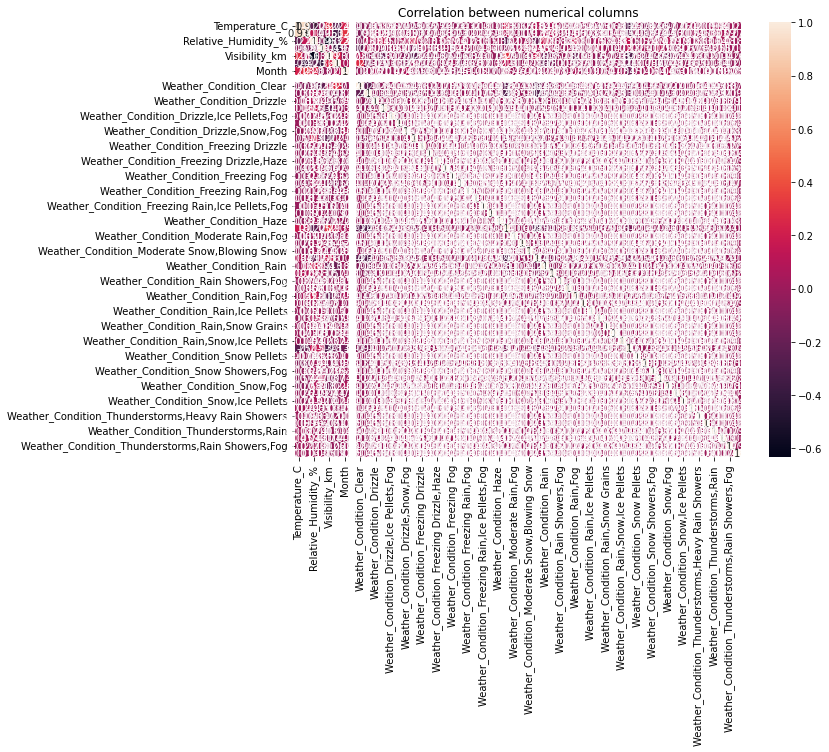

In [54]:
plt.figure(figsize=(10 , 8))
sns.heatmap(correlation , annot= True)
plt.title('Correlation between numerical columns')
plt.show()

The correlation matrix help you understand the realtionship between different weathere  variables.

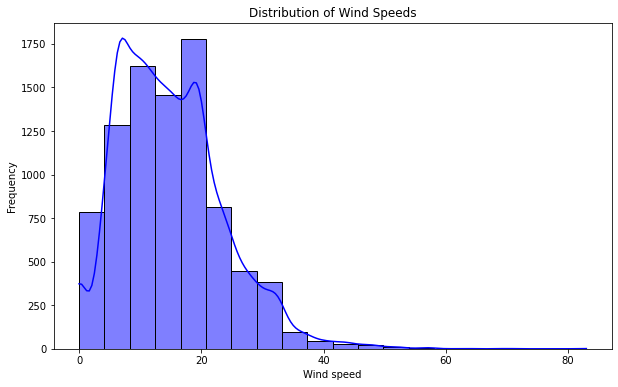

In [56]:
plt.figure(figsize=(10 , 6))
sns.histplot(df1['Wind Speed_km/h'] , bins = 20 , kde = True , color = 'blue')
plt.title('Distribution of Wind Speeds')
plt.xlabel('Wind speed')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:xlabel='Month', ylabel='Relative_Humidity_%'>

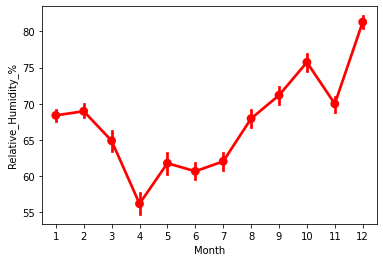

In [60]:
sns.pointplot(data = df1 ,x = 'Month' , y = 'Relative_Humidity_%' , color = 'red')

From the above graph you can see that the humidity is maxixmum in month of `December` and minimum in `April`

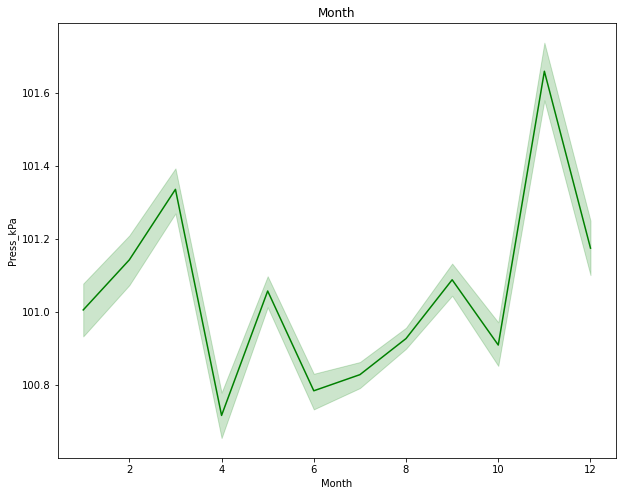

In [63]:
plt.figure(figsize= (10 , 8))
sns.lineplot(data = df1 ,x = 'Month' , y = 'Pressure_kPa' , color = 'green')
plt.title('Month')
plt.xlabel('Month')
plt.ylabel('Press_kPa')
plt.show()

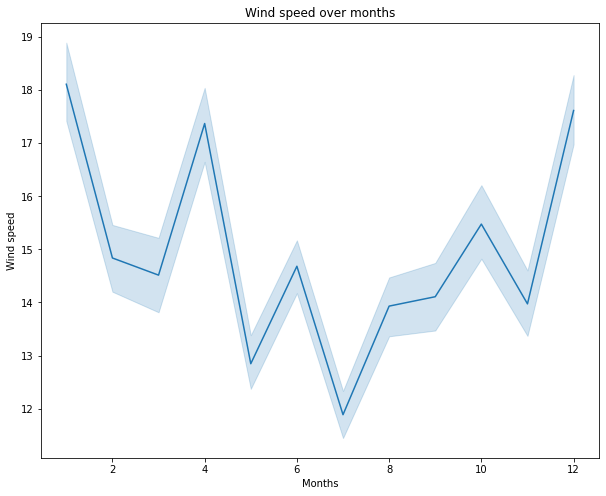

In [62]:
plt.figure(figsize= (10 , 8))
sns.lineplot(data = df1 , x = 'Month' , y = 'Wind Speed_km/h')
plt.title('Wind speed over months')
plt.xlabel('Months')
plt.ylabel('Wind speed')
plt.show()

The data suggests that `January` and `December` exhibit the highest wind speeds, making them the most windy months. On the contrary, `July` stands out as the least windy month based on the observed patterns. This information provides insights into the seasonal variations in wind intensity throughout the year.

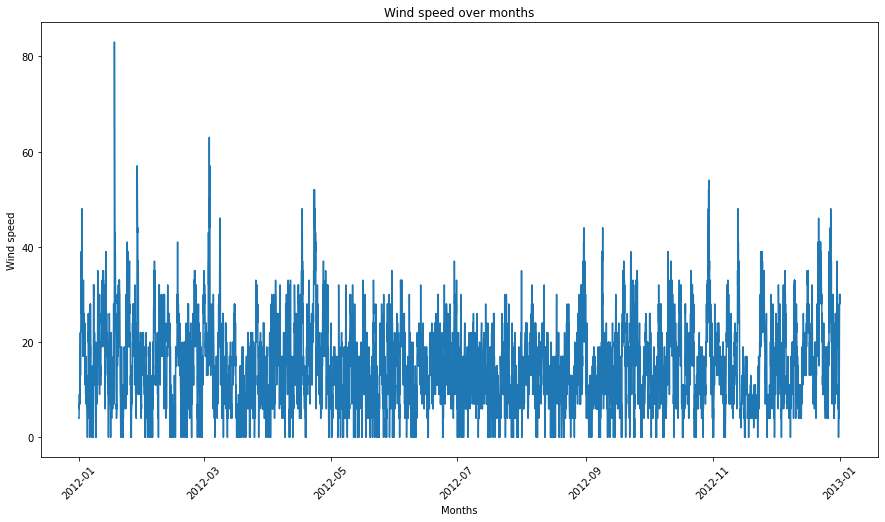

In [65]:
plt.figure(figsize= (15 , 8))
sns.lineplot(data = df1 , x = 'Date/Time' , y = 'Wind Speed_km/h')
plt.title('Wind speed over months')
plt.xlabel('Months')
plt.ylabel('Wind speed')
plt.xticks(rotation = 45)
plt.show()

The line plot depicting wind speed variations over time serves as a valuable tool for discerning trends and patterns in wind behavior. Notably, abrupt and substantial spikes in wind speed on the graph serve as clear indicators of storms or turbulent weather periods. These fluctuations in wind intensity provide crucial insights into the dynamic and potentially hazardous atmospheric conditions, aiding in the identification of stormy events or turbulent weather episodes over the observed time span.